In [1]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs, get_labeledSamples_avgAcc_withBounds
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/analysis_helpers.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


In [2]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["bp_smo_canceled", "margin", "kmeans",10, 30, 0.01, "Adam",20])
print(len(runs_bp_smo))
run_ids_smo = get_run_ids(runs_bp_smo.head(5))
run_ids_smo

5


0    457ac1b278f244b68de7cd6a94ed4ca6
1    2f9ebdbce5f249f49310c550c1fd9bfe
2    d2230c8c927241f0a6c1a6f520f2a748
3    ee3521ae05d74756af277dc69f76c5fc
4    32e692aaab8e4117b61da3004c7db8cc
Name: run_id, dtype: object

In [3]:
runs_bp_smo_wkmeans = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["bp_smo_canceled", "margin", "w_kmeans",10, 30, 0.01, "Adam",20])
print(len(runs_bp_smo_wkmeans))
run_ids_smo_wkmeans = get_run_ids(runs_bp_smo_wkmeans.head(5))
run_ids_smo_wkmeans

5


0    ff6f061a01b54885a4f7051e4f551392
1    42f22498f3a5456ca567369502d97037
2    eb39fb03d91a4370b3702f41dba833c9
3    451a3d3a2690425b9aacf70042e62823
4    d479032b68824f46946518e1b534cbbe
Name: run_id, dtype: object

In [4]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["centroids", "margin", "kmeans",1000, 30, 0.01, "Adam", 20])
print(len(runs_centroids))
run_ids_centroids = get_run_ids(runs_centroids.head(5))
run_ids_centroids

5


0    46e0e3c52d3e4bd1911ba2746e79d265
1    86cdbac1a89d413ab827426daa88b577
2    84a98cff23b048cf87bc001316584cfe
3    ed2c66f9e675432a8d232ab1ffc88ef0
4    0b758e28c50a4503b7230190b83ed45b
Name: run_id, dtype: object

In [5]:
runs_centroids_wkmeans = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["centroids", "margin", "w_kmeans",1000, 30, 0.01, "Adam", 20])
print(len(runs_centroids_wkmeans))
run_ids_centroids_wkmeans = get_run_ids(runs_centroids_wkmeans.head(5))
run_ids_centroids_wkmeans

5


0    cc75f9e086614f13ba0e3848bac19e13
1    b097c695970a429ab2ceab5ccc7d3850
2    87e2c60557dc4d8a8f7734c695bb283d
3    22cd3fe1f47c4f91a2202dd14d53fb84
4    b2a73088820c4bda989183ab5dd8d58b
Name: run_id, dtype: object

In [6]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["bp_prop_clustersize", "margin", "kmeans",1000, 30, 0.01, 10, 20])
print(len(runs_bp_clusterwise))
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise.head(5))
run_ids_bp_clusterwise

5


0    1a0a107242d846cf93fe7fa58044c5fa
1    a03ca221668043c79a58c6844eaf13c2
2    c08bfd0f076f4b16835be2be84b619ed
3    1e82eb74b8e64b248372239567f34d27
4    dc72d6e3d5a4436889403f676e8bcec0
Name: run_id, dtype: object

In [7]:
runs_bp_clusterwise_wkmeans = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["bp_prop_clustersize", "margin", "w_kmeans",1000, 30, 0.01, 10, 20])
print(len(runs_bp_clusterwise_wkmeans))
run_ids_bp_clusterwise_wkmeans = get_run_ids(runs_bp_clusterwise_wkmeans.head(5))
run_ids_bp_clusterwise_wkmeans

5


0    e66f7f96068348759e18b58d686055dc
1    024b03caca844972804548cca2842961
2    0e6bb3de3eb34475848840a6453ef5f8
3    ff69d65bf3dd400cb853173b7b627c62
4    312544bfa2d642488d27f12530985e1f
Name: run_id, dtype: object

In [8]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["boundary_points", "margin", "kmeans",1000, 0.01, 30, 10, 20])
print(len(runs_boundary))
run_ids_boundary = get_run_ids(runs_boundary.head(5))
run_ids_boundary

5


0    67affb65690a4ebb80e99aaa1fa5087b
1    d68377684b484600af5f3ac419805411
2    bc8ca604b3b247c4afee737b7c57b718
3    4522d3631cd74ca7a3c862a05c4ddc22
4    0c7c4aa971a647548d2a8810d978b38d
Name: run_id, dtype: object

In [9]:
runs_boundary_wkmeans = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["boundary_points", "margin", "w_kmeans",1000, 0.01, 30, 10, 20])
print(len(runs_boundary_wkmeans))
run_ids_boundary_wkmeans = get_run_ids(runs_boundary_wkmeans.head(5))
run_ids_boundary_wkmeans

5


0    adec891281564b35af6b0e77566a40a2
1    249dc24345c64f48ba9fb7acce67dc80
2    fcf4e4b446d945c6b0df9d9db45fb5fa
3    c2d4c2b564014ff4b2f407218ce13823
4    832e95e0e5c24c95bdee249c23579083
Name: run_id, dtype: object

In [10]:
runs_random_uncertainty = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size", "params.beta", "params.uncertainty"],[True, True, True, True, True, True],["random_uncertainty", 0.01, 30, 1000, 20, "margin"])
print(len(runs_random_uncertainty))
run_ids_random_uncertainty = get_run_ids(runs_random_uncertainty.head(5))
run_ids_random_uncertainty

5


0    71303339bd34442b91a30eb4512fdd7a
1    cf276eb20075433f9597b565bc27e561
2    bb63474b616c4237b03f117358b8238c
3    0c8b968cc2a744ee88067602a3a44dc2
4    2600107a4da643608142c083639f9010
Name: run_id, dtype: object

In [11]:
samples_labeled_bp_smo, avg_accs_bp_smo, lower_smo, upper_smo = get_labeledSamples_avgAcc_withBounds(run_ids_smo, tracking)
samples_labeled_bp_smo_wkmeans, avg_accs_bp_smo_wkmeans, lower_smo_wk, upper_smo_wk = get_labeledSamples_avgAcc_withBounds(run_ids_smo_wkmeans, tracking)

samples_labeled_centroids, avg_accs_centroids, lower_cent, upper_cent = get_labeledSamples_avgAcc_withBounds(run_ids_centroids, tracking)
samples_labeled_centroids_wkmeans, avg_accs_centroids_wkmeans, lower_cent_wk, upper_cent_wk = get_labeledSamples_avgAcc_withBounds(run_ids_centroids_wkmeans, tracking)

samples_labeled_clusterwise, avg_accs_clusterwise, lower_clust, upper_clust = get_labeledSamples_avgAcc_withBounds(run_ids_bp_clusterwise, tracking)
samples_labeled_clusterwise_wkmeans, avg_accs_clusterwise_wkmeans, lower_clust_wk, upper_clust_wk = get_labeledSamples_avgAcc_withBounds(run_ids_bp_clusterwise_wkmeans, tracking)

samples_labeled_boundary, avg_accs_boundary, lower_bp, upper_bp = get_labeledSamples_avgAcc_withBounds(run_ids_boundary, tracking)
samples_labeled_boundary_wkmeans, avg_accs_boundary_wkmeans, lower_bp_wk, upper_bp_wk = get_labeledSamples_avgAcc_withBounds(run_ids_boundary_wkmeans, tracking)

samples_labeled_random_uncertain, avg_accs_random_uncertain, lower_rc, upper_rc = get_labeledSamples_avgAcc_withBounds(run_ids_random_uncertainty, tracking)

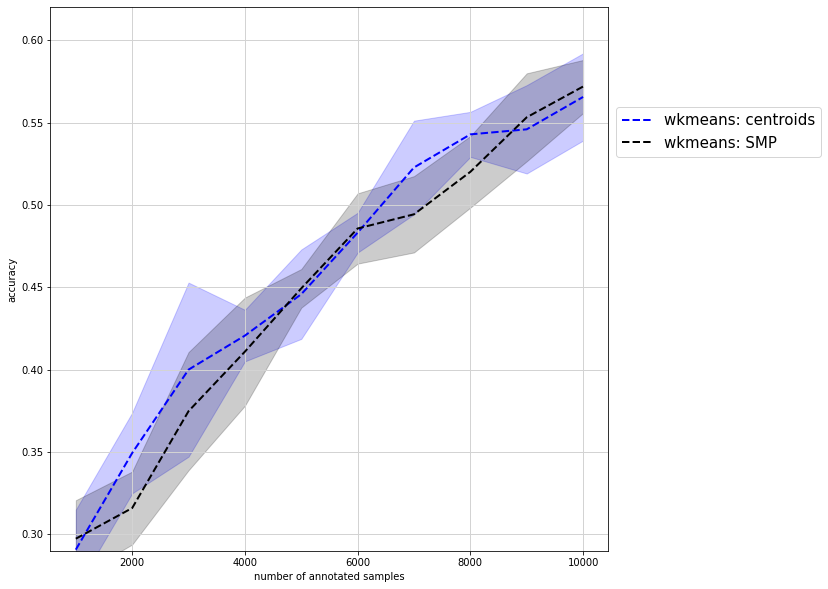

In [23]:
# plot
plt.figure( figsize=(10,10) )
#plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='kmeans: SMC', linewidth=2)
#plt.fill_between(samples_labeled_bp_smo, lower_smo, upper_smo, alpha=0.2, color='red')
#plt.plot(samples_labeled_bp_smo_wkmeans, avg_accs_bp_smo_wkmeans,color='red', label='wkmeans: SMC', linestyle='--', linewidth=2)
#plt.fill_between(samples_labeled_bp_smo_wkmeans, lower_smo_wk, upper_smo_wk, alpha=0.2, color='red')

#plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='kmeans: centroids', linewidth=2)
#plt.fill_between(samples_labeled_centroids, lower_cent, upper_cent, alpha=0.2, color='blue')
plt.plot(samples_labeled_centroids_wkmeans, avg_accs_centroids_wkmeans,color='blue', label='wkmeans: centroids', linestyle='--', linewidth=2)
plt.fill_between(samples_labeled_centroids_wkmeans, lower_cent_wk, upper_cent_wk, alpha=0.2, color='blue')

#plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='kmeans: WMC', linewidth=2)
#plt.fill_between(samples_labeled_clusterwise, lower_clust, upper_clust, alpha=0.2, color='magenta')
#plt.plot(samples_labeled_clusterwise_wkmeans, avg_accs_clusterwise_wkmeans,color='magenta', label='wkmeans: WMC', linestyle='--', linewidth=2)
#plt.fill_between(samples_labeled_clusterwise_wkmeans, lower_clust_wk, upper_clust_wk, alpha=0.2, color='magenta')

#plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='kmeans: SMP', linewidth=2)
#plt.fill_between(samples_labeled_boundary, lower_bp, upper_bp, alpha=0.2, color='black')
plt.plot(samples_labeled_boundary_wkmeans, avg_accs_boundary_wkmeans,color='black', label='wkmeans: SMP', linestyle='--', linewidth=2)
plt.fill_between(samples_labeled_boundary_wkmeans, lower_bp_wk, upper_bp_wk, alpha=0.2, color='black')

#plt.plot(samples_labeled_random_uncertain, avg_accs_random_uncertain,color='yellow', label='RC',linewidth=2)
#plt.fill_between(samples_labeled_random_uncertain, lower_rc, upper_rc, alpha=0.2, color='yellow')

plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.62])
plt.legend(bbox_to_anchor=(1,0.83), loc="upper left", prop={"size":15})
#plt.savefig('/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/figures/line_charts/beta10.png')
plt.show()